Distance of a point from a line:   
* the line is defined by w as: $\{x: \langle w,x \rangle\}$. The norm of $w$ is one: $\|w\| = \|w\|^2 = \sum_i w_i^2 = 1$ 
* the point $\hat x$ 
* the distance: $\min_{x: \langle w,x \rangle = 0}\| \hat x - x \| = |\langle w, \hat x \rangle|$



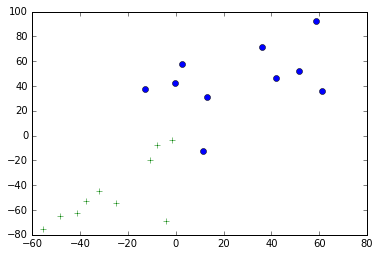

In [21]:
#reading our 2D data, and centering by deleting the average:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
city_list = list()
forest_list = list()

for i in range(10):
    img = mpimg.imread('../data/forest' + str(i) + '.jpg')
    forest_list.append([img[:,:,0].sum() / img[:,:,0].size, img[:,:,2].sum() / img[:,:,2].size])

    img = mpimg.imread('../data/city' + str(i) + '.jpg')
    city_list.append([img[:,:,0].sum() / img[:,:,0].size, img[:,:,2].sum() / img[:,:,2].size])

average = np.mean(city_list + forest_list, axis=0)
city_array_centered = np.array(city_list)-average   
forest_array_centered = np.array(forest_list)-average  
plt.plot(forest_array_centered[:,0], forest_array_centered[:,1], 'g+')
plt.plot(city_array_centered[:,0], city_array_centered[:,1], 'bo')
plt.show()

# Learning a seperating hyperplane using logistic regression. 

First, we visualize a hyperplane 

In [22]:
from IPython import display
import time 

def plot_seperating_hyperlane(w):
    print w
    w = w / np.linalg.norm(w)
    t = np.arange(-60.0, 80.0, 10.0)
    plt.plot(w[1]*t, -w[0]*t, 'k--', lw=2)
    plt.plot(-0.64173183*t, 0.76692911*t, 'k', lw=2)
    plt.plot(forest_array_centered[:,0], forest_array_centered[:,1], 'g+')
    plt.plot(city_array_centered[:,0], city_array_centered[:,1], 'bo')
    plt.show()
    display.clear_output(wait=True)
    time.sleep(10.0)

Second, we construct the training data

In [23]:
x = np.row_stack((city_array_centered, forest_array_centered))
x

array([[ 58.67750944,  92.52747693],
       [ 61.06699777,  36.36109839],
       [ 51.63023654,  52.45117466],
       [ 13.13373985,  30.72858376],
       [ 42.01647129,  46.37502332],
       [ 36.12010782,  71.60146866],
       [-12.88855116,  37.50546004],
       [ 11.41819499, -12.16015347],
       [  2.84279725,  57.38211847],
       [ -0.27460183,  42.44503282],
       [ -7.80937524,  -7.62243874],
       [ -1.74619196,  -3.61650129],
       [-55.40629066, -75.36756012],
       [-48.2673979 , -64.61429388],
       [-31.90779692, -44.89345397],
       [-37.56918966, -52.89780813],
       [-25.04628764, -54.70538002],
       [ -3.94982127, -69.24644923],
       [-41.37937777, -62.31628069],
       [-10.66117296, -19.93711751]])

And their labels

In [24]:
y = np.array([-1]*10 + [1]*10)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [25]:
total_examples = len(y)
total_examples

20

The logistoc regression learning algorithm

In [26]:
from sklearn import linear_model
classifier = linear_model.LogisticRegression()
classifier.fit(x,y)
probabilities = classifier.predict_proba(x)
probabilities



array([[  1.00000000e+00,   2.73446809e-28],
       [  1.00000000e+00,   2.92879223e-21],
       [  1.00000000e+00,   4.88461421e-21],
       [  9.99999970e-01,   3.01063390e-08],
       [  1.00000000e+00,   9.36371376e-18],
       [  1.00000000e+00,   1.11247577e-19],
       [  9.84225274e-01,   1.57747263e-02],
       [  9.46636399e-01,   5.33636007e-02],
       [  9.99999997e-01,   3.03446842e-09],
       [  9.99997956e-01,   2.04353657e-06],
       [  8.98737215e-04,   9.99101263e-01],
       [  1.00454024e-01,   8.99545976e-01],
       [  0.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00],
       [  5.32907052e-15,   1.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00],
       [  1.39888101e-14,   1.00000000e+00],
       [  3.60891317e-11,   1.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00],
       [  3.55058412e-06,   9.99996449e-01]])

In [37]:
probabilities.round(decimals=2)

array([[ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.98,  0.02],
       [ 0.95,  0.05],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.1 ,  0.9 ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ]])

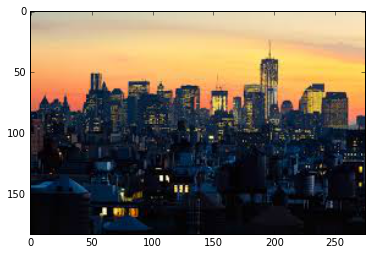

In [43]:
#95% certain city image
img = mpimg.imread('../data/city' + str(7) + '.jpg')
plt.imshow(img)

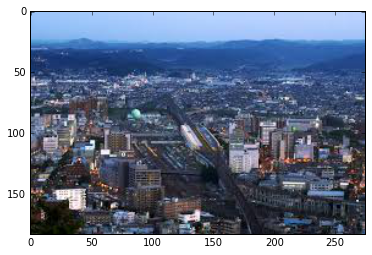

In [44]:
#98% certain city image
img = mpimg.imread('../data/city' + str(6) + '.jpg')
plt.imshow(img)

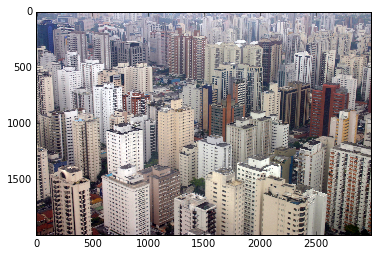

In [45]:
#100% certain city image
img = mpimg.imread('../data/city' + str(2) + '.jpg')
plt.imshow(img)

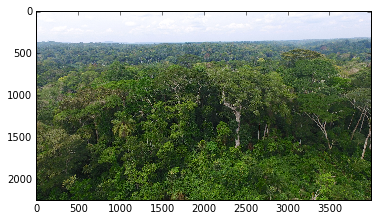

In [47]:
#90% certain forest image
img = mpimg.imread('../data/forest' + str(1) + '.jpg')
plt.imshow(img)

In [31]:
w = classifier.coef_[0]
w / np.linalg.norm(w)

array([-0.8826747 , -0.46998444])

[-0.58825453 -0.31321899]


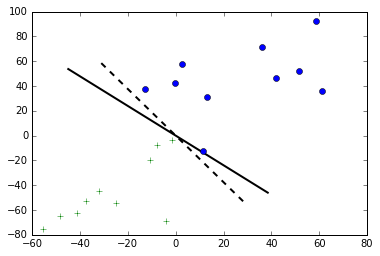

In [33]:
plot_seperating_hyperlane(w)
